In [2]:
!cd

g:\xasm\02MachineLearning\02Preprocessing\exercises


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/vpn.csv")
df.head()

user_country   location_selected protocol        date  time_to_connect  \
0           GB         UK - London      udp  2018-02-06             15.0   
1           FR  France - Paris - 1      udp  2018-02-06             61.0   
2           GB         UK - London      udp  2018-02-06             52.0   
3           GB         UK - London      udp  2018-02-06             21.0   
4           GB         UK - London      tcp  2018-02-06            100.0   

   download_speed  latency  
0         58942.0     88.0  
1         11878.0    528.0  
2         18254.0    322.0  
3         93798.0     38.0  
4         12048.0    460.0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_country       100000 non-null  object 
 1   location_selected  100000 non-null  object 
 2   protocol           99972 non-null   object 
 3   date               100000 non-null  object 
 4   time_to_connect    99865 non-null   float64
 5   download_speed     99851 non-null   float64
 6   latency            77466 non-null   float64
dtypes: float64(3), object(4)
memory usage: 5.3+ MB


In [9]:
df.describe()

time_to_connect  download_speed        latency
count     99865.000000    99851.000000   77466.000000
mean        137.027187    44377.239551     326.879947
std         697.982668    37969.777874    4594.842451
min           0.000000        0.000000       0.000000
25%          24.000000    17153.415900      59.000000
50%          40.000000    33734.100000     102.000000
75%          77.000000    60952.478500     199.000000
max       60113.000000   372800.317800  978256.000000

In [8]:
df.isnull().sum()

user_country             0
location_selected        0
protocol                28
date                     0
time_to_connect        135
download_speed         149
latency              22534
dtype: int64

In [35]:
df['date'][0]

'2018-02-06'

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2018-02-06
1       2018-02-06
2       2018-02-06
3       2018-02-06
4       2018-02-06
           ...    
99995   2018-02-17
99996   2018-02-17
99997   2018-02-17
99998   2018-02-17
99999   2018-02-17
Name: date, Length: 100000, dtype: datetime64[ns]

In [4]:
# unique values
col_name = ['user_country', 'location_selected', 'protocol']
for col in col_name:
    print(col," : ",df[col].unique())
# get range of date
print('\n\nDate')
print(df['date'].agg(['min', 'max']))
print(df['date'].unique())

user_country  :  ['GB' 'FR' 'DE']
location_selected  :  ['UK - London' 'France - Paris - 1' 'Germany - Nuremberg']
protocol  :  ['udp' 'tcp' 'l2tp' 'sstp' nan 'pptp' 'cisco_ipsec' 'ipsec_ikev2']


Date
min   2018-02-06
max   2018-02-20
Name: date, dtype: datetime64[ns]
['2018-02-06T00:00:00.000000000' '2018-02-07T00:00:00.000000000'
 '2018-02-09T00:00:00.000000000' '2018-02-08T00:00:00.000000000'
 '2018-02-11T00:00:00.000000000' '2018-02-10T00:00:00.000000000'
 '2018-02-12T00:00:00.000000000' '2018-02-13T00:00:00.000000000'
 '2018-02-14T00:00:00.000000000' '2018-02-15T00:00:00.000000000'
 '2018-02-16T00:00:00.000000000' '2018-02-17T00:00:00.000000000'
 '2018-02-18T00:00:00.000000000' '2018-02-19T00:00:00.000000000'
 '2018-02-20T00:00:00.000000000']


<AxesSubplot:ylabel='latency'>

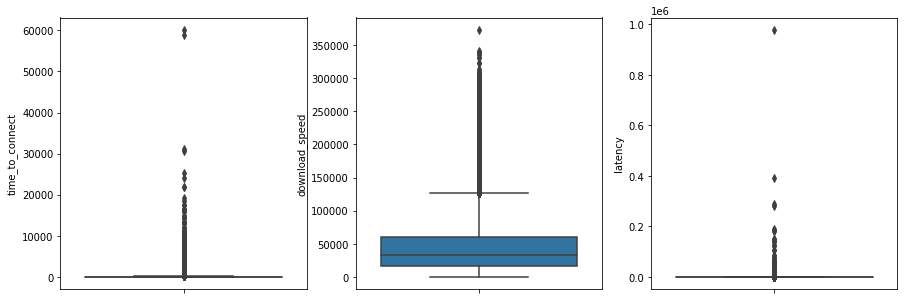

In [18]:

fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.boxplot(y = 'time_to_connect', data=df, ax=axes[0])
sns.boxplot(y = 'download_speed', data=df, ax=axes[1])
sns.boxplot(y = 'latency', data=df, ax=axes[2])

<ipython-input-5-4aea42cf2663>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') for ax in axes]


<AxesSubplot:xlabel='date', ylabel='latency'>

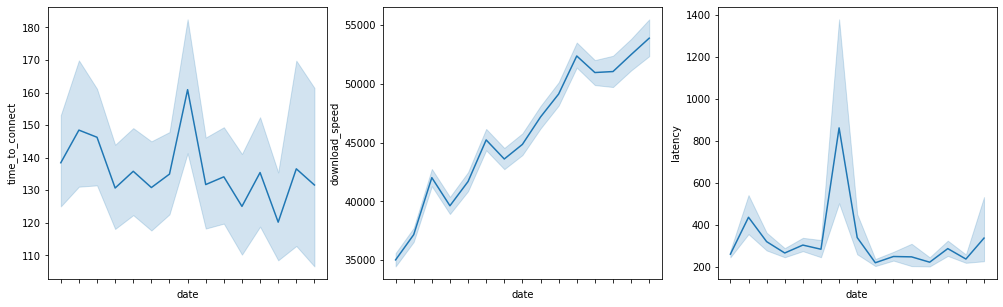

In [5]:
fig, axes = plt.subplots(1,3, figsize = (17,5))
[ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') for ax in axes]
sns.lineplot(y = 'time_to_connect', x='date', data=df, ax=axes[0])
sns.lineplot(y = 'download_speed', x='date', data=df, ax=axes[1])
sns.lineplot(y = 'latency', x='date', data=df, ax=axes[2])

<ipython-input-7-7166ccc2af9e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') for ax in axes]


<AxesSubplot:xlabel='date', ylabel='latency'>

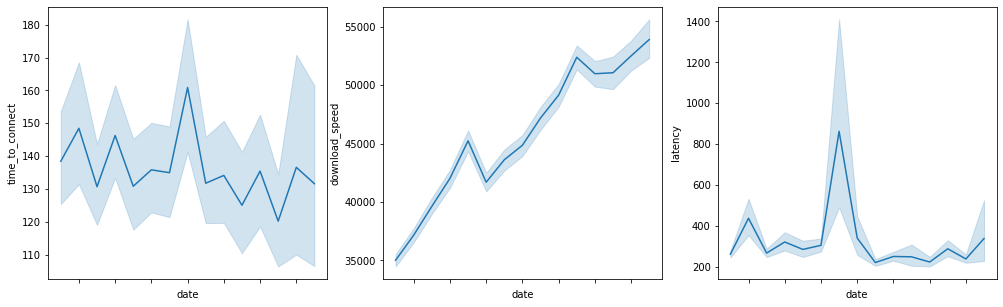

In [7]:
fig, axes = plt.subplots(1,3, figsize = (17,5))
[ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') for ax in axes]
sns.lineplot(y = 'time_to_connect', x='date', data=df, ax=axes[0])
sns.lineplot(y = 'download_speed', x='date', data=df, ax=axes[1])
sns.lineplot(y = 'latency', x='date', data=df, ax=axes[2])

<AxesSubplot:xlabel='date', ylabel='latency'>

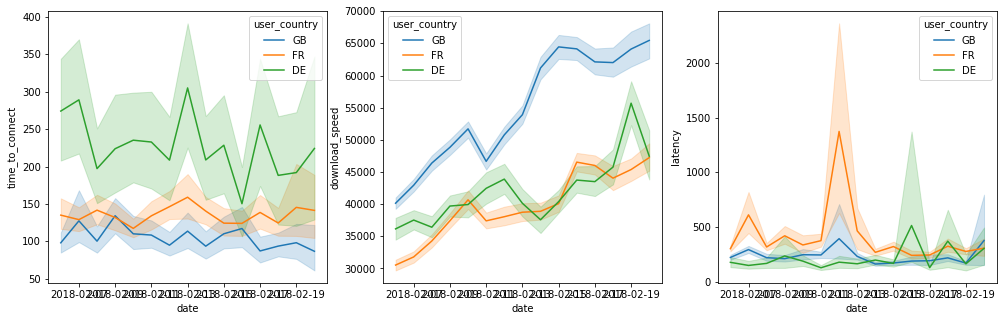

In [19]:
fig, axes = plt.subplots(1,3, figsize = (17,5))
#plt.xticks(fontsize=20)
sns.lineplot(y = 'time_to_connect', x='date', hue = 'user_country', data=df, ax=axes[0])
sns.lineplot(y = 'download_speed', x='date', hue = 'user_country', data=df, ax=axes[1])
sns.lineplot(y = 'latency', x='date', hue = 'user_country', data=df, ax=axes[2])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_country       100000 non-null  object        
 1   location_selected  100000 non-null  object        
 2   protocol           99972 non-null   object        
 3   date               100000 non-null  datetime64[ns]
 4   time_to_connect    99865 non-null   float64       
 5   download_speed     99851 non-null   float64       
 6   latency            77466 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 5.3+ MB


In [ ]:
#FLAGG
#try append 

<AxesSubplot:xlabel='date', ylabel='time_to_connect'>

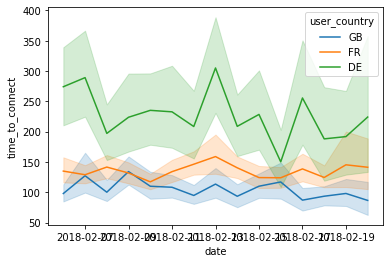

In [6]:
sns.lineplot(y = 'time_to_connect', x='date', hue = 'user_country', data=df)

In [54]:
df['user_country'].value_counts()/df['user_country'].value_counts().mean()
df['user_country'].value_counts(normalize=True)

FR    0.48731
GB    0.38349
DE    0.12920
Name: user_country, dtype: float64

In [25]:
df.groupby(["user_country","location_selected"]).count()

protocol   date  time_to_connect  \
user_country location_selected                                       
DE           France - Paris - 1        418    418              418   
             Germany - Nuremberg     12056  12068            12032   
             UK - London               434    434              433   
FR           France - Paris - 1      36544  36551            36521   
             Germany - Nuremberg      1386   1386             1386   
             UK - London             10793  10794            10786   
GB           France - Paris - 1       6049   6053             6025   
             Germany - Nuremberg       342    342              342   
             UK - London             31950  31954            31922   

                                  download_speed  latency  
user_country location_selected                             
DE           France - Paris - 1              418      376  
             Germany - Nuremberg           12026     5605  
             UK - London                     433      340  
FR           France - Paris - 1            36520    27345  
             Germany - Nuremberg            1385     1326  
             UK - London                   10784    10299  
GB           France - Paris - 1             6022     4121  
             Germany - Nuremberg             342      315  
             UK - London                   31921    27739

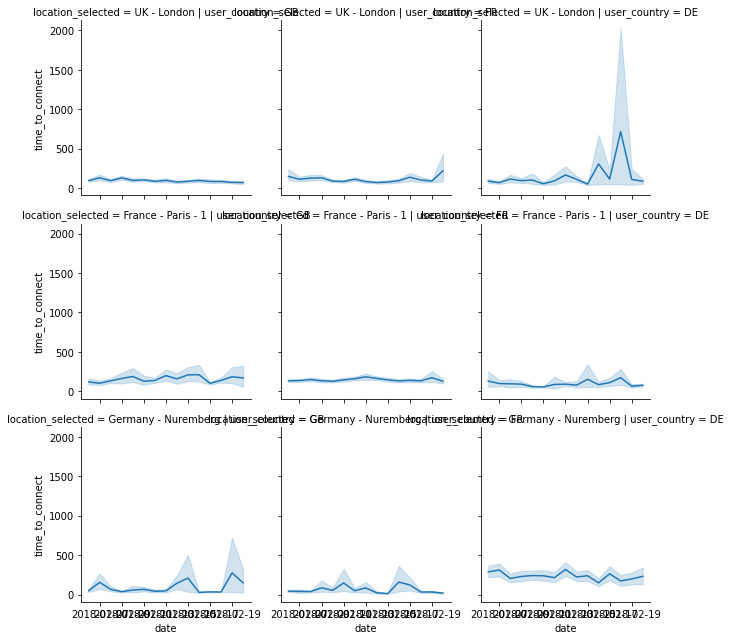

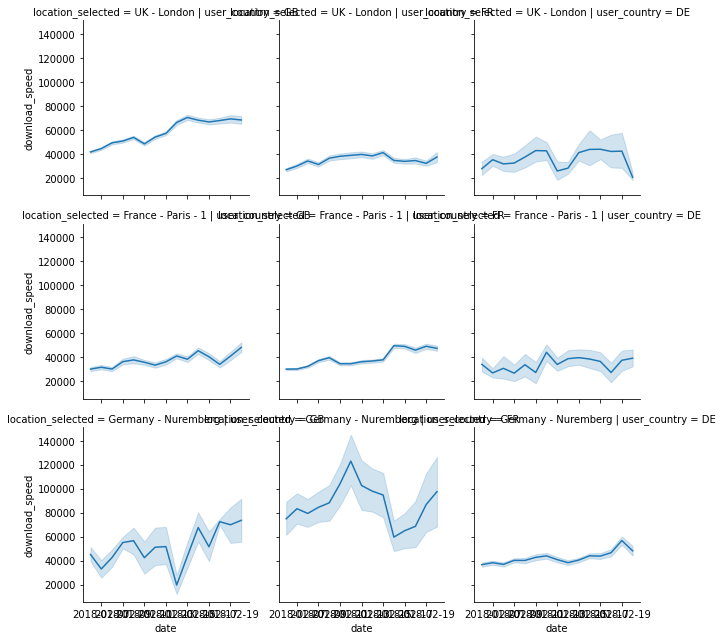

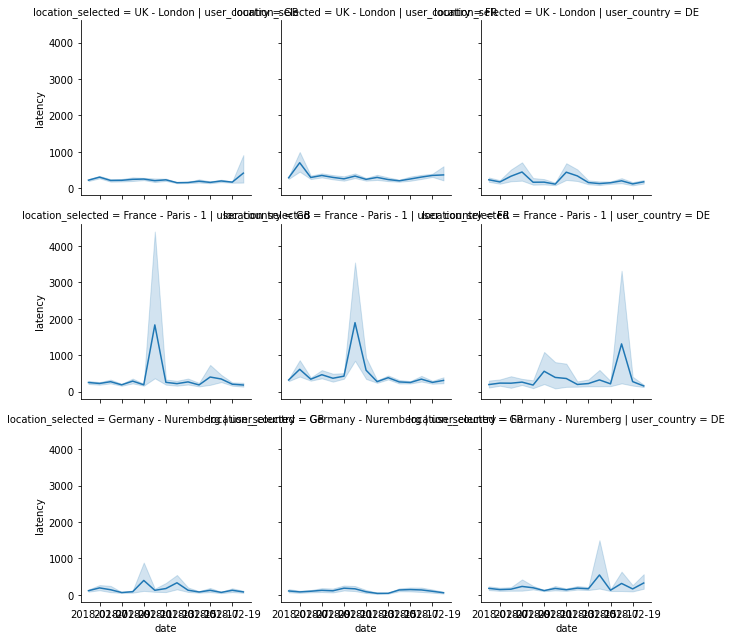

In [27]:
for col in ("time_to_connect", "download_speed", "latency"):
    g = sns.FacetGrid(df, col="user_country",  row="location_selected")
    g.map(sns.lineplot, "date", col)

In [83]:
#a = df.groupby('user_country')['date'].value_counts().to_frame().reset_index()
a = df.groupby('user_country')['date'].value_counts().to_frame()
a.columns = ['sum']
a.reset_index(inplace=True)

<AxesSubplot:xlabel='date', ylabel='sum'>

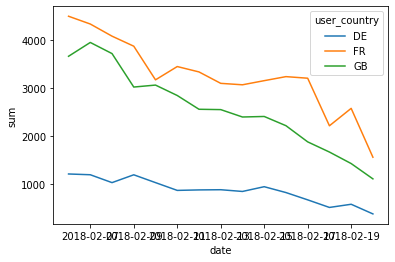

In [84]:
sns.lineplot(data = a, x = 'date', y = 'sum', hue = 'user_country')

<AxesSubplot:xlabel='date', ylabel='sum'>

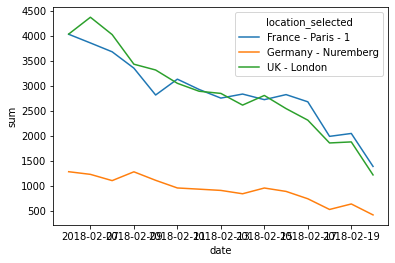

In [85]:
a = df.groupby('location_selected')['date'].value_counts().to_frame()
a.columns = ['sum']
a.reset_index(inplace=True)
sns.lineplot(data = a, x = 'date', y = 'sum', hue = 'location_selected')

In [52]:
df.groupby('user_country')['date'].value_counts().to_frame().index.names

FrozenList(['user_country', 'date'])

In [71]:
df.groupby('date')['time_to_connect'].mean().sort_values()

date
2018-02-18    120.197390
2018-02-16    125.044982
2018-02-08    130.685168
2018-02-10    130.830612
2018-02-20    131.609603
2018-02-14    131.747808
2018-02-15    134.125116
2018-02-12    134.959935
2018-02-17    135.438679
2018-02-11    135.823323
2018-02-19    136.580206
2018-02-06    138.443301
2018-02-09    146.275935
2018-02-07    148.473589
2018-02-13    160.895442
Name: time_to_connect, dtype: float64

In [ ]:
Problems: General decreasing trend on user
1. Extra Budget should be put on improving France-Paris-1 servers and DE connect to UK, in terms of connection quality but not capacity.

Futher:
1. More data on industry counterparts for comparsion
2. lack of ground to compare performance, can only inspect the variance

In [68]:
[i for i in dir(df.groupby('date')['time_to_connect'].mean()) if 'get' in i]

['__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '_get_axis',
 '_get_axis_name',
 '_get_axis_number',
 '_get_axis_resolvers',
 '_get_block_manager_axis',
 '_get_bool_data',
 '_get_cacher',
 '_get_cleaned_column_resolvers',
 '_get_cython_func',
 '_get_index_resolvers',
 '_get_item_cache',
 '_get_label_or_level_values',
 '_get_numeric_data',
 '_get_value',
 '_get_values',
 '_get_values_tuple',
 '_get_with',
 'get']